In [9]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
import numpy as np
%matplotlib inline
#plt.style.use('Solarize_Light2')
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages
#from pandas.plotting import register_matplotlib_converters
#register_matplotlib_converters()


In [10]:
cov = cov = pd.read_csv('C:\\Users\\ASUS\\Documents\\covid_19\\covid_new\\new_datav5.csv', sep=';')

In [11]:
y=cov['Senegal']

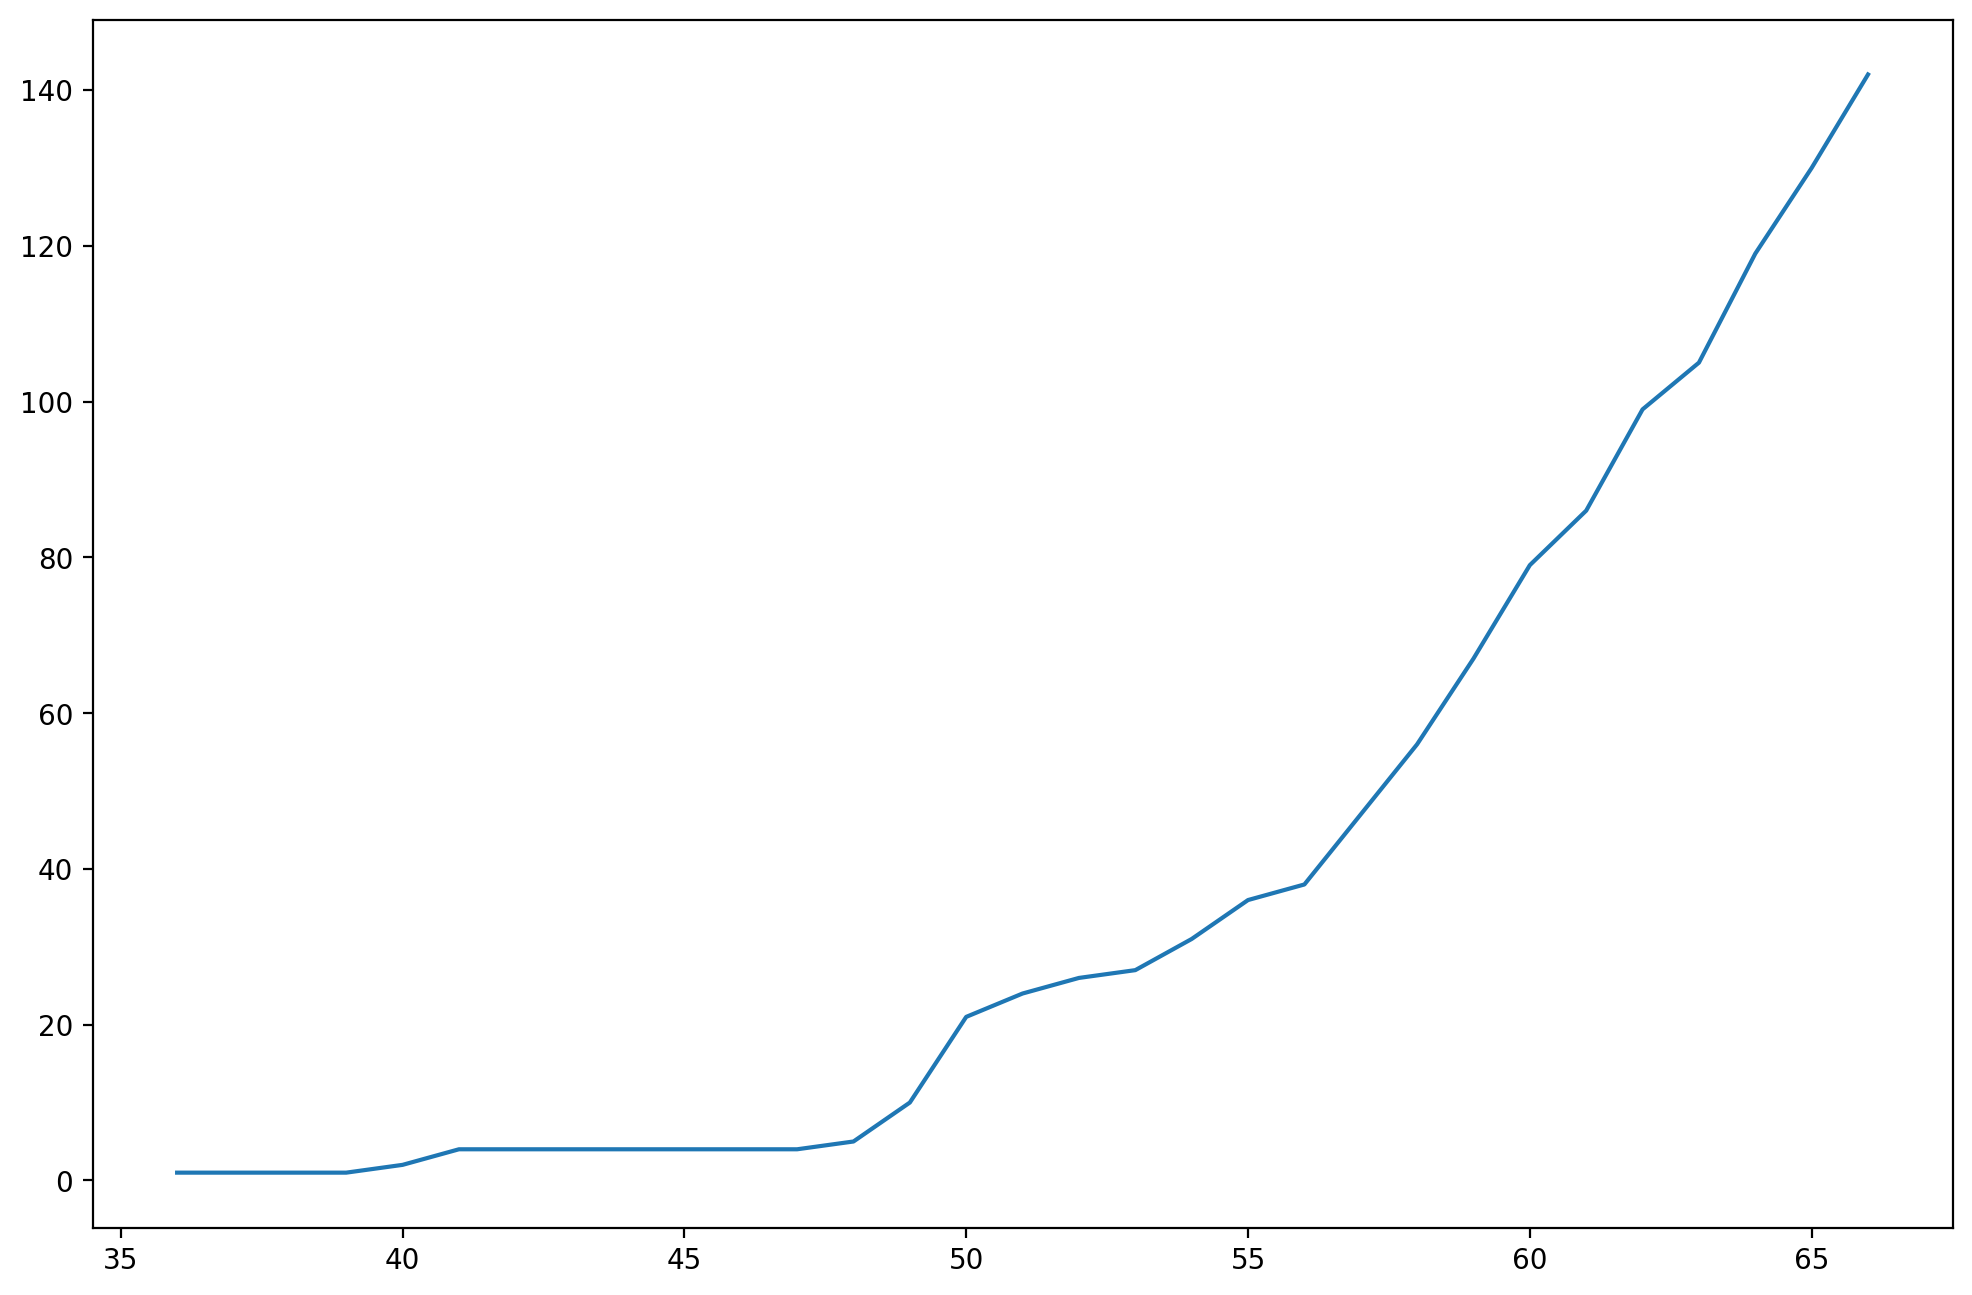

In [12]:
plt.figure(figsize=(12,8),dpi=200)
plt.plot(cov['Senegal'][36:], label="Cases")
plt.show ()


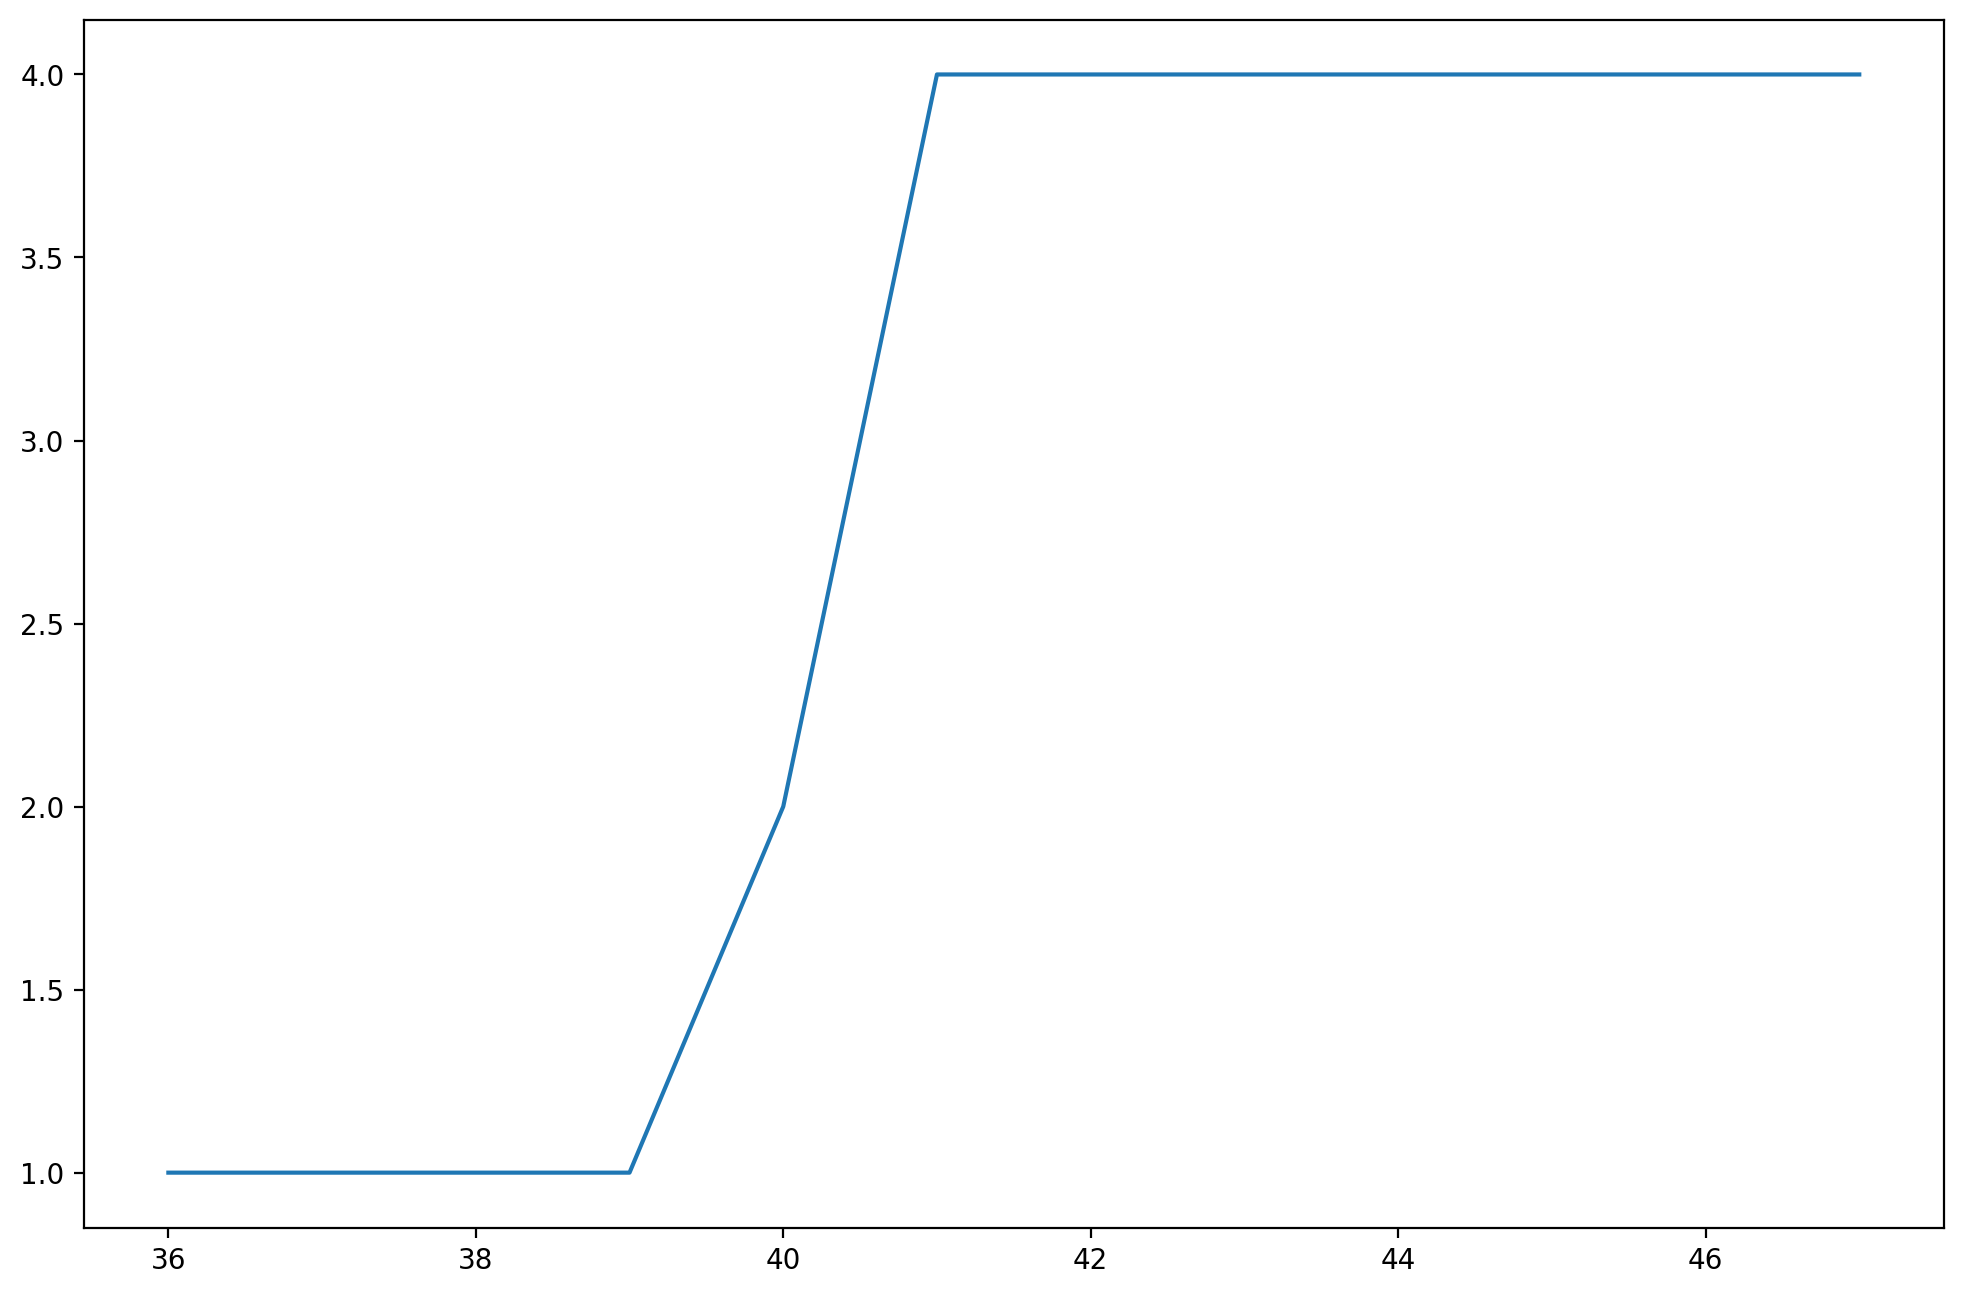

In [13]:
plt.figure(figsize=(12,8),dpi=200)
plt.plot(cov['Senegal'][36:48], label="Cases")
plt.show ()

##  Simulation avec la fonction $ f(t)=bt.ln(1+at)$

In [30]:
# Définition de la fonction 𝑓(𝑡)=𝑏𝑡.𝑙𝑛(1+𝑎𝑡)
import numpy as np
def func_ln(a,b,t):
    y=a*t*np.log(1+b*t)
    return  y

## Estimation des valeurs de a et b
Nous pensons que les coefficients a et b prennent des valeurs comprises entre 0 et 1. Ainsi pour trouver les meilleurs 
valeurs de a et b  nous avons essayé tous le valeurs comprises entre 0 et 1 avec un pas de 0.1.
Pour la suite nous uiliserons le couple (a,b) qui retourne le plus petit MSE


In [46]:
data=cov['Senegal'][36:].reset_index()

data1=data['Senegal'][0:13]
data2=data['Senegal'][13:]
temps=data1.index
from sklearn.metrics import mean_squared_error
value_poss=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
mse_list=[]
params=[]
for i in value_poss:
    for j in value_poss:
        predict=func_ln(i,j,temps)
        error = mean_squared_error(data1, predict)
        mse_list.append(error)
        params.append((i,j))
ind=mse_list.index(min(mse_list))
#print(mse_list[ind],params[ind])
print('Le MSE minimal est {0} et les valeur de a et b correspondantes sont {1}'.format(mse_list[ind],params[ind]))





Le MSE minimal est 1.2189409811829084 et les valeur de a et b correspondantes sont (0.2, 0.9)


## Prédiction avec la fonction $ f(t)=0.9t.ln(1+0.2t)$
Nous appliquons la fonctions avec les valeurs de a et b trouver ci dessus enrtre les dates   $28/02/2020$(index=0) et $11/03/2020$(index=12).

Le résultat est sauvegarde dans la variable **predicted1**.


In [47]:
predicted1=func_ln(params[ind][0],params[ind][1],temps)
predicted1=pd.Series(predicted1)

## Preparation dees données

**data2**:  est  le jeu de données entre les dates $11/03/2020$(index=12) et   $29/03/2020$(index=30) 

Pour prédire le nombre de cas dans les jours suivants nous concatenons  les jeux de données predicted1 et data2 et nous appelons **data2**


In [49]:
data3=predicted1.append(data2)

# Lissage de par la methode de Holt avec Tendance linèaire

Le MSE minimal est 8.76482833513878 et la valeur de alpha et beta correspondantes sont (0.9, 0.5)
Le MSE est 9.640366869854505


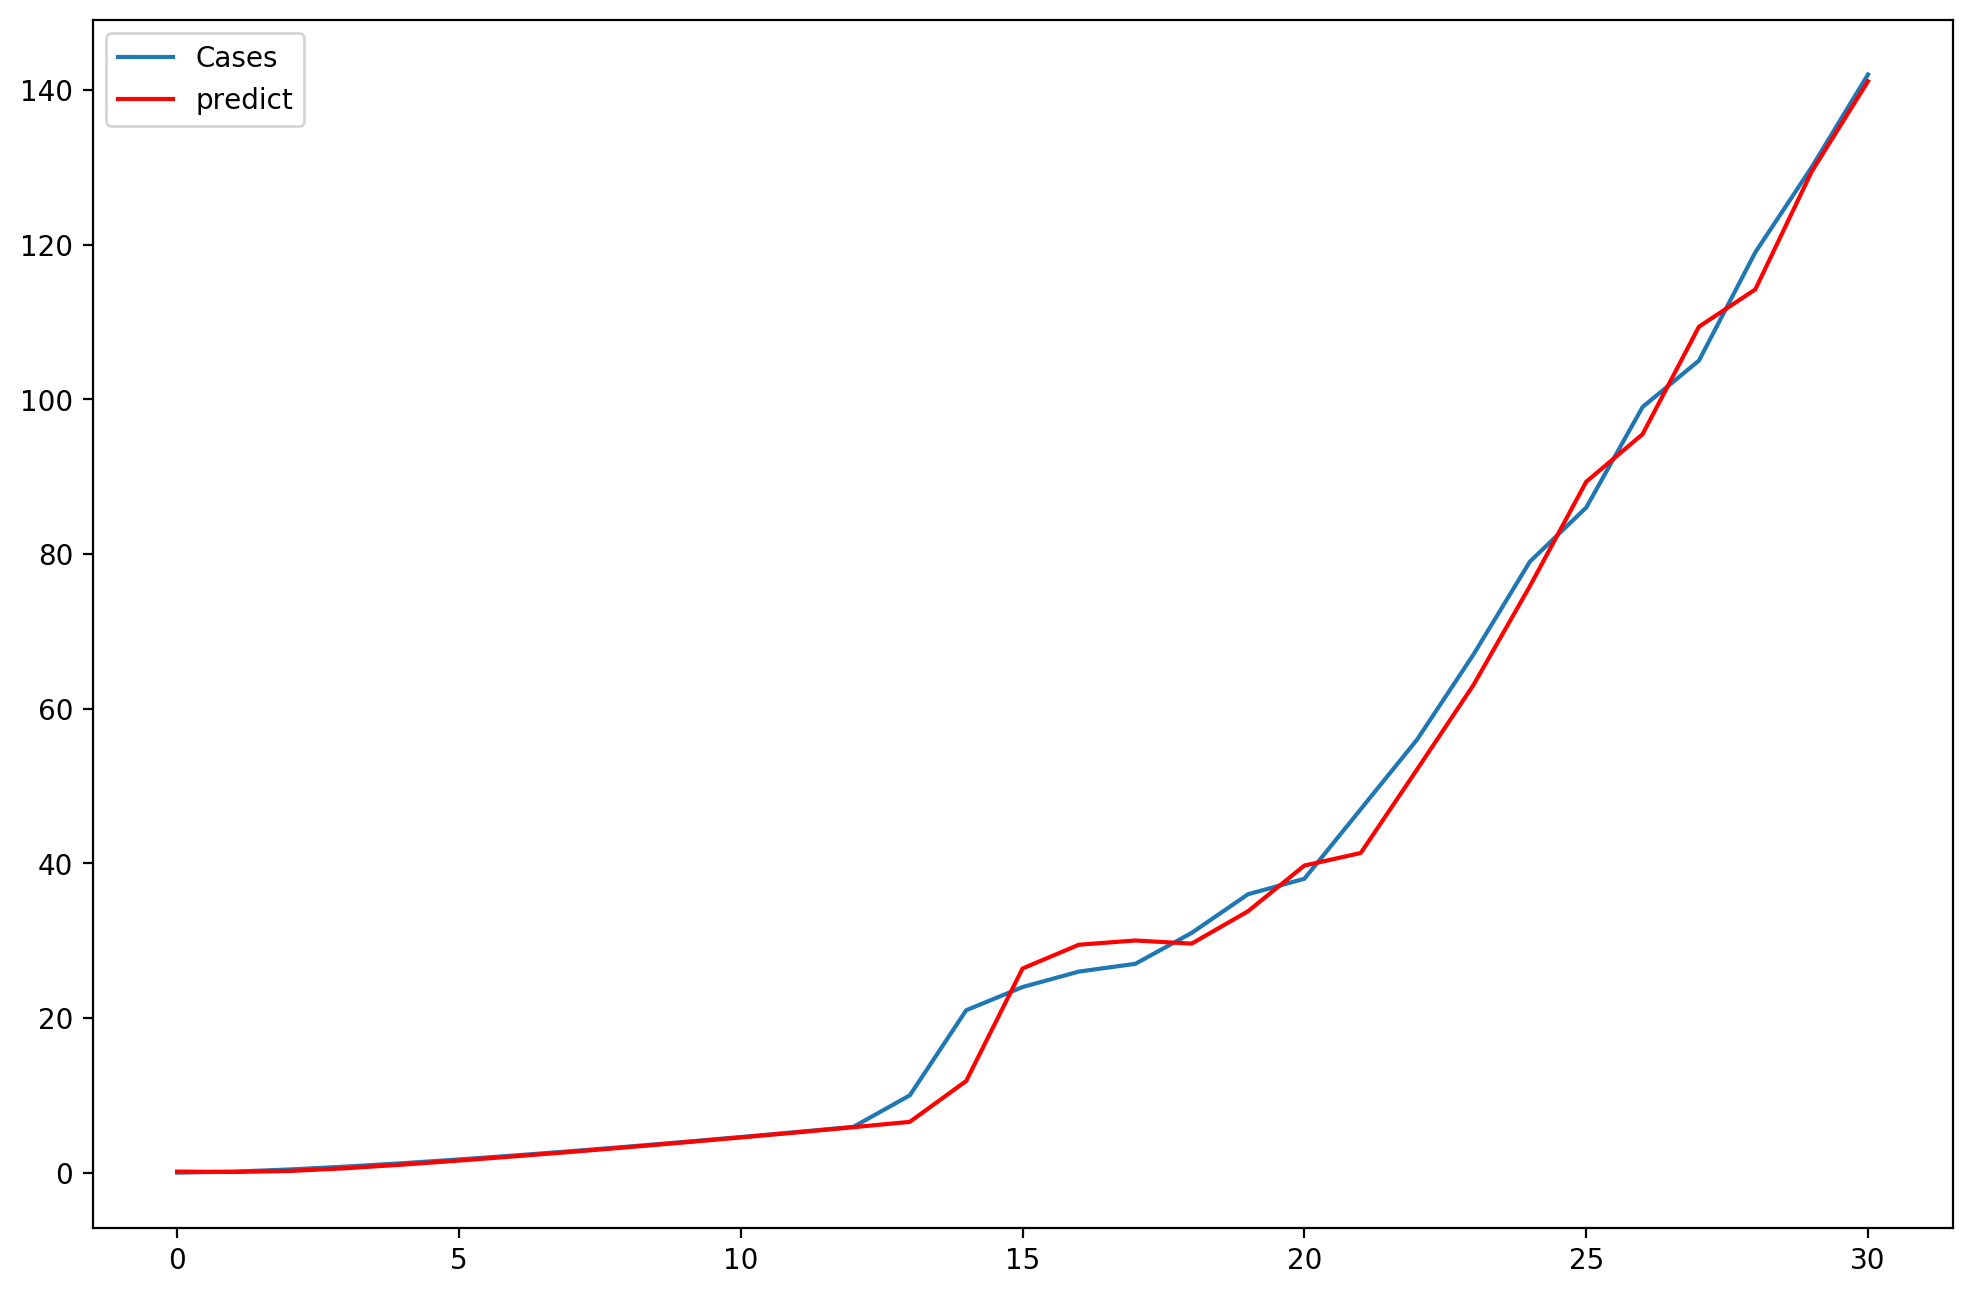

Les prévisions pour les 5 prochains jours sont:
31    153.481892
32    165.052087
33    176.622283
34    188.192479
35    199.762674
Name: Additive trend, dtype: float64 


In [51]:
value_poss=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
from sklearn.metrics import mean_squared_error
mse_list=[]
params=[]
for i in value_poss:
    for j in value_poss:
        fit3 = Holt(data3).fit(smoothing_level=i, smoothing_slope=j)
        fcast3 = fit3.forecast(5).rename("Additive  trend")
        predicted=fit3.fittedvalues
        error = mean_squared_error(data3, predicted)
        mse_list.append(error)
        params.append((i,j))
ind=mse_list.index(min(mse_list))
#print(mse_list[ind],params[ind])
print('Le MSE minimal est {0} et la valeur de alpha et beta correspondantes sont {1}'.format(mse_list[ind],params[ind]))

fit3 = Holt(data3).fit(smoothing_level=params[ind][0], smoothing_slope=params[ind][1])
#fcast3= fit3.forecast(5).rename("Exponential trend")
error = mean_squared_error(data3, predicted)
print( 'Le MSE est {}'.format(error))

# Visualisation de la prévision
plt.figure(figsize=(12,8),dpi=200)
plt.plot(data3, label="Cases") # la courbe des données réelles 
plt.plot(fit3.fittedvalues, label="predict",color='red')# la courbe des données prédites
plt.legend()
plt.show ()

fcast3 = fit3.forecast(5).rename("Additive trend")
print( 'Les prévisions pour les 5 prochains jours sont:')
      
print('{} '.format(fcast3))



## Lissage de par la methode de Holt avec Tendance amortie 

Le MSE minimal est 8.76482833513877 et la valeur de alpha et beta correspondantes sont (0.9, 0.5)
Le MSE est 9.625876571023031


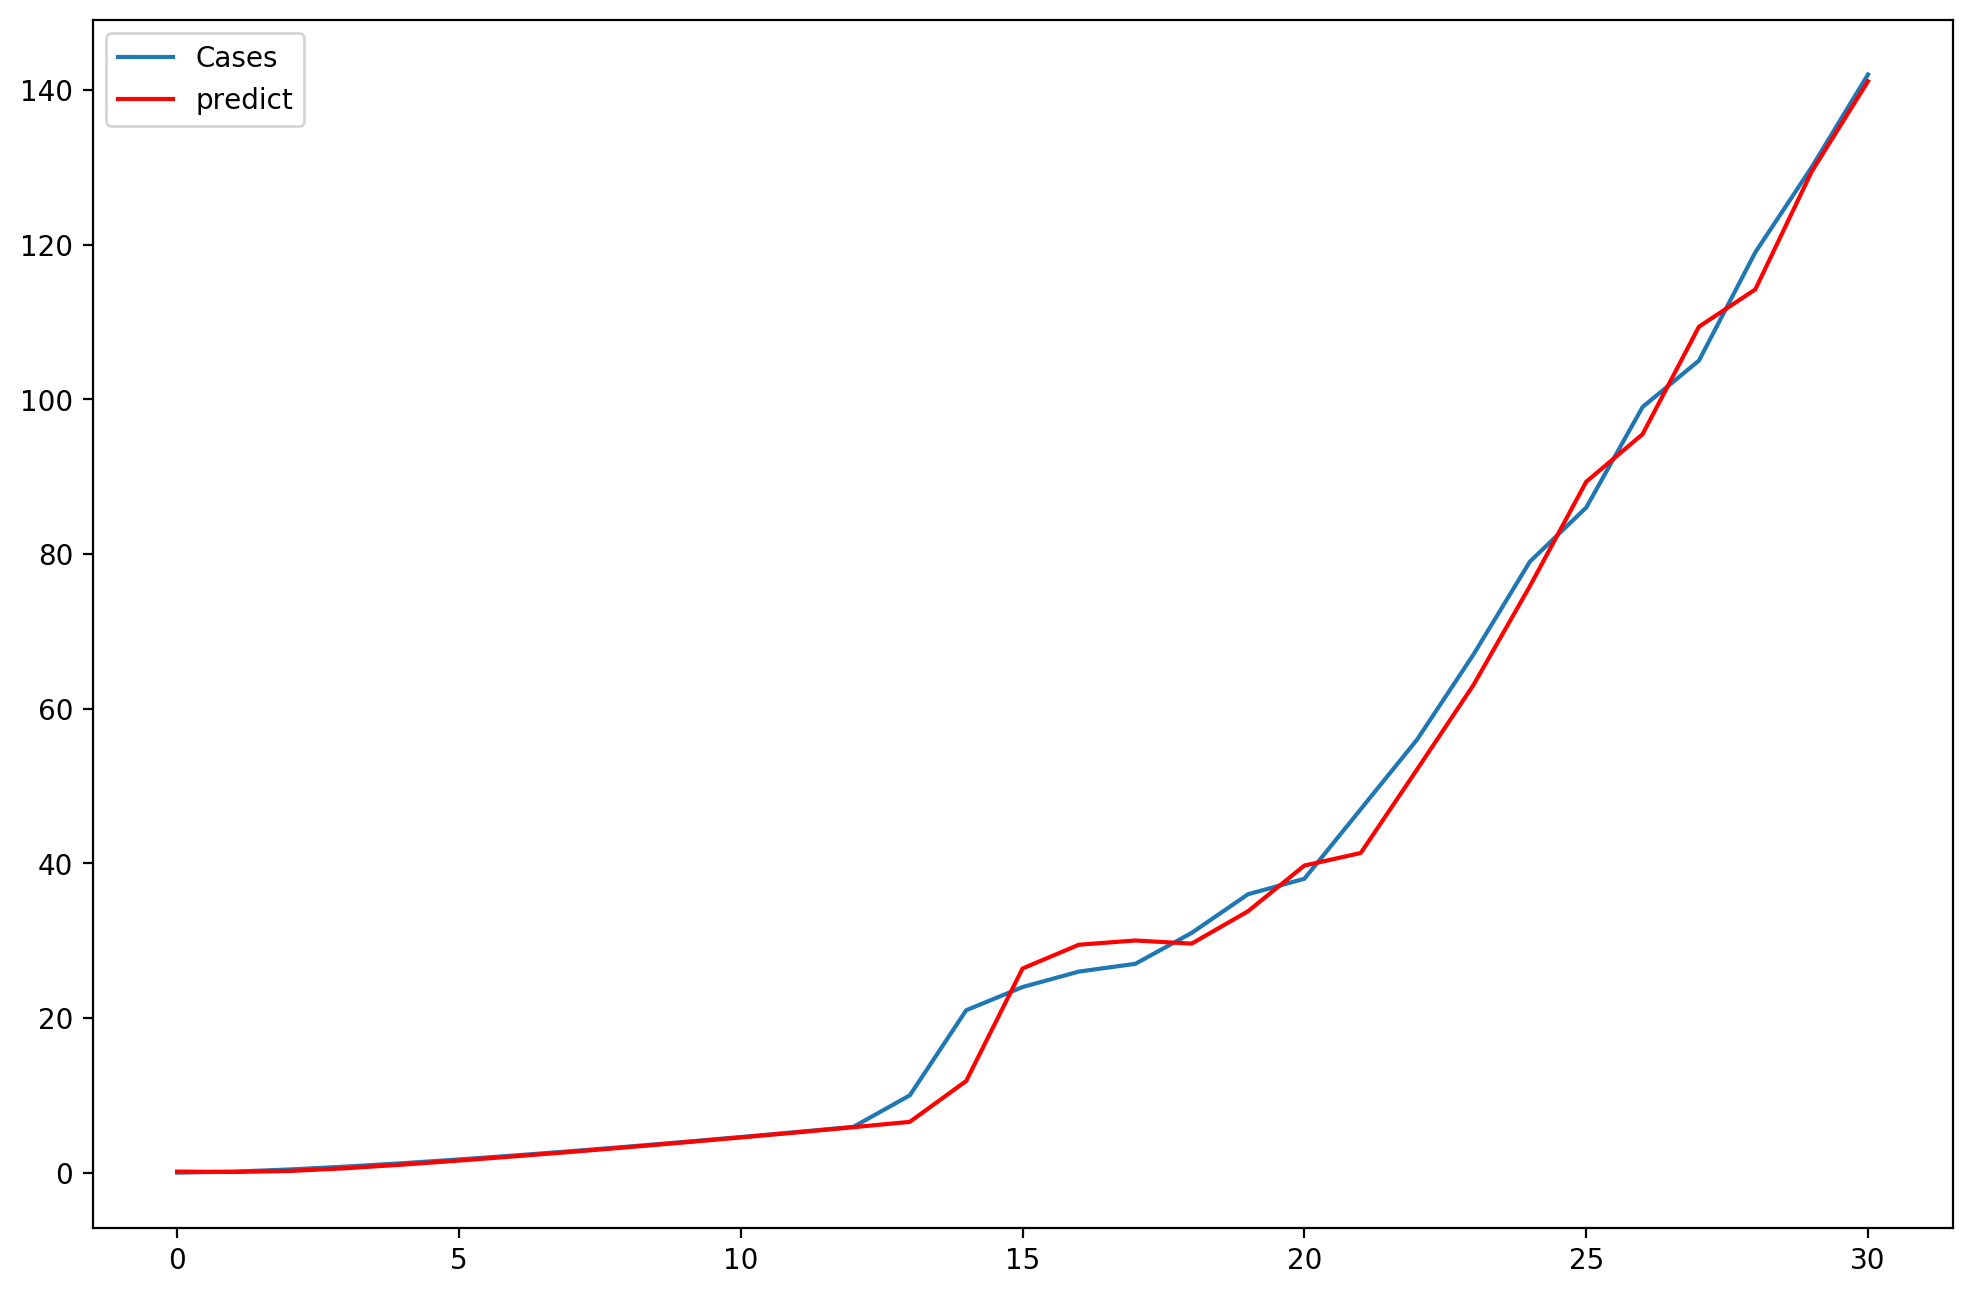

Les prévisions pour les 5 prochains jours sont:
31    153.481892
32    165.052087
33    176.622283
34    188.192479
35    199.762674
Name: trend amorti, dtype: float64 


In [52]:
value_poss=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
from sklearn.metrics import mean_squared_error
mse_list=[]
params=[]
for i in value_poss:
    for j in value_poss:
        fit3 = Holt(data3, damped=True).fit(smoothing_level=i, smoothing_slope=j)
        fcast3 = fit3.forecast(5).rename("Additive damped trend")
        predicted=fit3.fittedvalues
        error = mean_squared_error(data3, predicted)
        mse_list.append(error)
        params.append((i,j))
ind=mse_list.index(min(mse_list))
#print(mse_list[ind],params[ind])
print('Le MSE minimal est {0} et la valeur de alpha et beta correspondantes sont {1}'.format(mse_list[ind],params[ind]))

fit3 = Holt(data3, damped=True).fit(smoothing_level=params[ind][0], smoothing_slope=params[ind][1])
#fcast3= fit3.forecast(5).rename("Exponential trend")
error = mean_squared_error(data3, predicted)
print( 'Le MSE est {}'.format(error))

# Visualisation de la prévision
plt.figure(figsize=(12,8),dpi=200)
plt.plot(data3, label="Cases") # la courbe des données réelles 
plt.plot(fit3.fittedvalues, label="predict",color='red')# la courbe des données prédites
plt.legend()
plt.show ()

fcast3 = fit3.forecast(5).rename("trend amorti")
print( 'Les prévisions pour les 5 prochains jours sont:')
      
print('{} '.format(fcast3))

## Lissage de par la methode de Holt avec Tendance exponentielle

Le MSE minimal est 18.227546592633633 et la valeur de alpha et beta correspondantes sont (0.9, 0.4)
Le MSE est 21.937474805912224


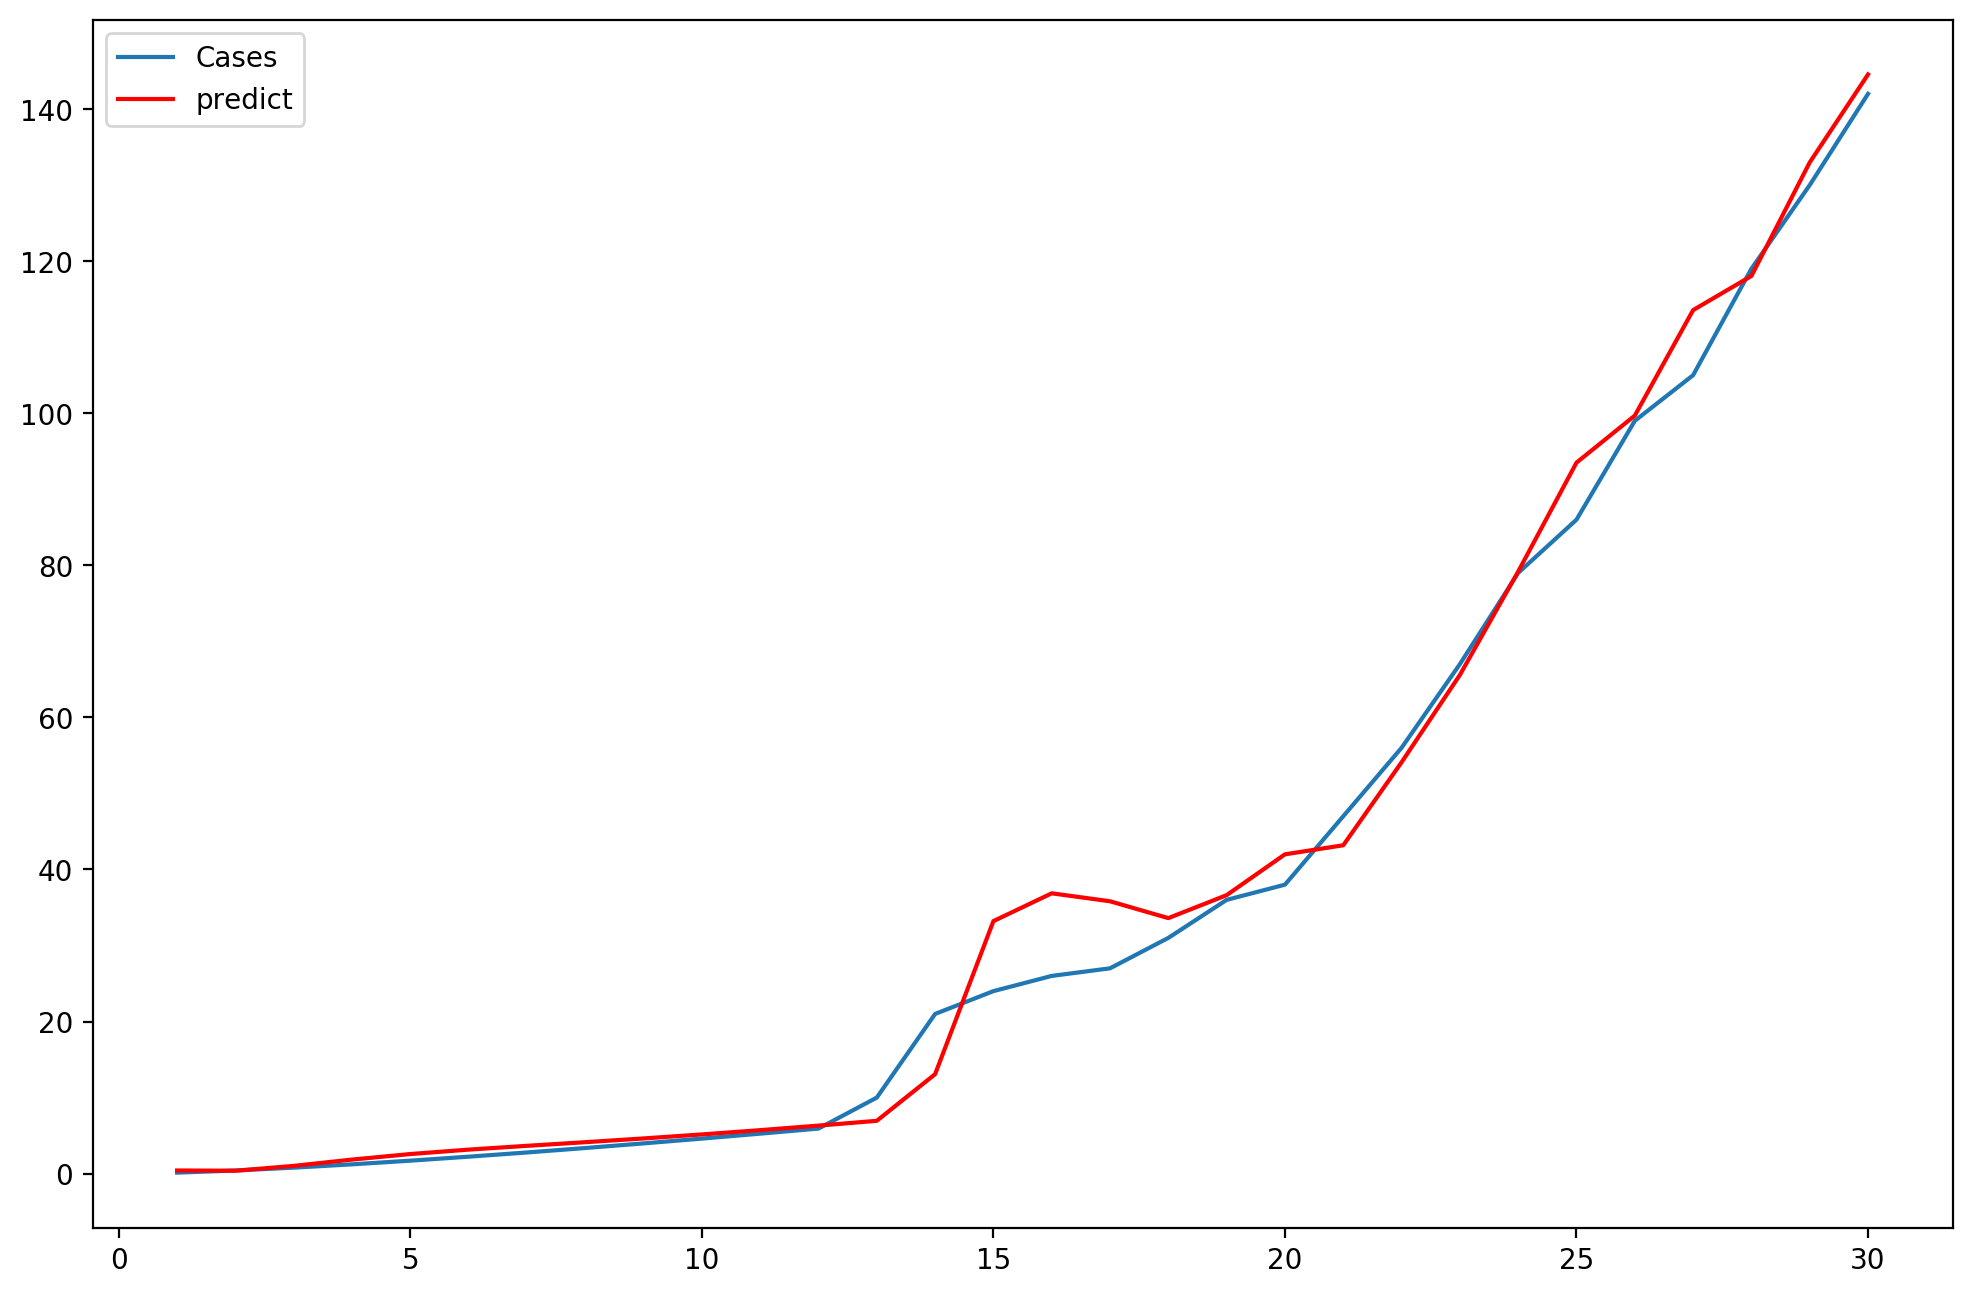

Les prévisions pour les 5 prochains jours sont:
32    172.858202
33    190.546635
34    210.045111
35    231.538850
36    255.232025
Name: Exponential trend, dtype: float64 


In [53]:
value_poss=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
from sklearn.metrics import mean_squared_error
mse_list=[]
params=[]
for i in value_poss:
    for j in value_poss:
        fit2 = Holt(data3[1:], exponential=True).fit(smoothing_level=i, smoothing_slope=j, optimized=False)
        #fcast2 = fit2.forecast(5).rename("Exponential trend")
        predicted=fit2.fittedvalues
        error = mean_squared_error(data3[1:], predicted)
        mse_list.append(error)
        params.append((i,j))
ind=mse_list.index(min(mse_list))
#print(mse_list[ind],params[ind])
print('Le MSE minimal est {0} et la valeur de alpha et beta correspondantes sont {1}'.format(mse_list[ind],params[ind]))


fit2 = Holt(data3[1:], exponential=True).fit(smoothing_level=params[ind][0], smoothing_slope=params[ind][1], optimized=False)
fcast2= fit2.forecast(5).rename("Exponential trend")
error = mean_squared_error(data3[1:], predicted)
print( 'Le MSE est {}'.format(error))

# Visualisation de la prévision
plt.figure(figsize=(12,8),dpi=200)
plt.plot(data3[1:], label="Cases") # la courbe des données réelles 
plt.plot(fit2.fittedvalues, label="predict",color='red')# la courbe des données prédites
plt.legend()
plt.show ()

fcast2 = fit2.forecast(5).rename("Exponential trend")
print( 'Les prévisions pour les 5 prochains jours sont:')
      
print('{} '.format(fcast2))